In [51]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

In [52]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [53]:
class NetTanh(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

In [54]:
class NetRelu(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [55]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    for epoch in range(epochs):
        for i, (x,y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28*28))
            _, label = torch.max(z,1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_loader))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff



In [56]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [57]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [58]:
criterion = nn.CrossEntropyLoss()

In [59]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [60]:
input_dim = 28*28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

In [61]:
cust_epochs = 10

In [62]:
learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)
training_results

{'training_loss': [2.317592144012451,
  2.321540117263794,
  2.327293872833252,
  2.323732376098633,
  2.320798635482788,
  2.314169406890869,
  2.320502281188965,
  2.312079429626465,
  2.316753387451172,
  2.3236083984375,
  2.3222999572753906,
  2.3195009231567383,
  2.312457799911499,
  2.3259644508361816,
  2.3210222721099854,
  2.314155101776123,
  2.3111746311187744,
  2.318732976913452,
  2.309246063232422,
  2.3172478675842285,
  2.3147149085998535,
  2.3134753704071045,
  2.312221050262451,
  2.316352128982544,
  2.3086111545562744,
  2.3129310607910156,
  2.31280517578125,
  2.3185389041900635,
  2.31152606010437,
  2.311582565307617,
  2.311999559402466,
  2.3114354610443115,
  2.31083345413208,
  2.3043112754821777,
  2.3083510398864746,
  2.311539649963379,
  2.305763006210327,
  2.312978744506836,
  2.312148094177246,
  2.300525665283203,
  2.3048524856567383,
  2.3059356212615967,
  2.311671257019043,
  2.3056676387786865,
  2.3082053661346436,
  2.3066763877868652,
  2

In [63]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [64]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

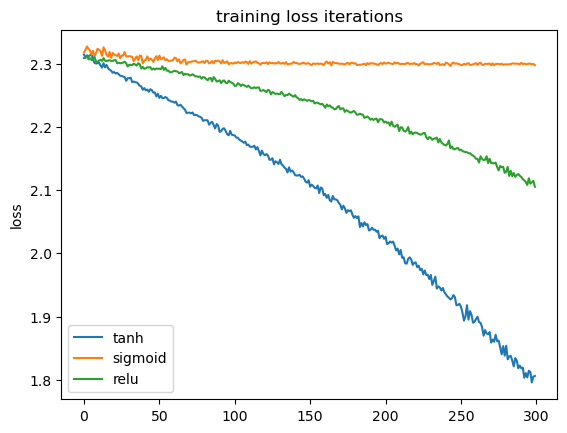

In [65]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

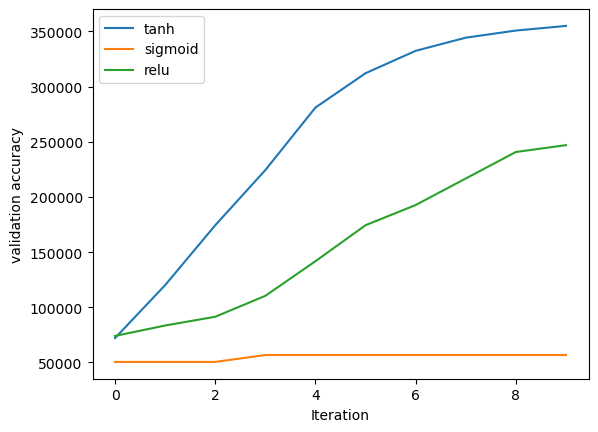

In [66]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()